In [117]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')


## Data Preprocessing and Cleaning

In [118]:
#First we read and Understand the data
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [119]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [121]:
#Information Summary of the given dataset
#We have 119390 rows/observations and total 32 features/columns.
#From the information it is observed that company column has 6797 non-null entries, means most of the that has missing values in the dataset
#We have 12 categorical data:  'hotel',  'arrival_date_month',  'meal',  'country',  'market_segment',  'distribution_channel',
 #'reserved_room_type',  'assigned_room_type',  'deposit_type',  'customer_type',  'reservation_status',  'reservation_status_date'
#The rest colums are numerical features.
# The target variable whether hotel booking is is_canceled, where 0 indicates not canceled and 1 as canceled.
#Since target variable has only two possible values therefore we apply, Classification Models

In [122]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [123]:
#First we will check whether data is imbalaced or not 
df.value_counts("is_canceled")

is_canceled
0    75166
1    44224
dtype: int64

In [124]:
#This indicates it is imbalanced dataset
#we will check if any data is duplicate or not
df[df.duplicated()]
df.iloc[119354]==df.iloc[119353]
df.drop_duplicates(inplace= False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [125]:
percent_missing=df.isnull().sum()*100/len(df)
percent_missing

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [126]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [127]:
missing_perct_df=pd.DataFrame({"col_name":df.columns,"% missing":percent_missing})
# missing_perct_df.head(11)
missing_perct_df.sort_values(by="% missing",ascending=False)

,col_name,% missing
company,company,94.306893
agent,agent,13.686238
country,country,0.408744
children,children,0.003350
reserved_room_type,reserved_room_type,0.000000
assigned_room_type,assigned_room_type,0.000000
booking_changes,booking_changes,0.000000
deposit_type,deposit_type,0.000000
hotel,hotel,0.000000
previous_cancellations,previous_cancellations,0.000000


In [128]:
#since company contains 94% of missing data we will drop
df.drop(['company'], axis=1,inplace=True)

In [129]:

df=df.apply(lambda x: x.fillna(0),axis=0)
# df2=df.iloc[ : , 0]
# new_df=pd.concat([df,df2],axis=1).reindex(df.index)
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [130]:
df.value_counts("is_canceled")

is_canceled
0    75166
1    44224
dtype: int64

In [131]:
# If adults, children and babies all are zero at the same time,
#which means no guests in a hotel, and we  considered that as hotel room is not 
#booked at all, so we can drop those entries too

In [132]:

df=df[~((df.children == 0) & (df.adults == 0) & (df.babies == 0))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal            

In [133]:
obj=list(df.select_dtypes(include='object').columns)
obj

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [134]:
df.select_dtypes(exclude='object').columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

## Exploratory Data Analysis (EDA)

In [135]:
#We find which different countries has done hotel bookings
#Hotel can be booked multiple times by the same country too
countrywise_bookings = df.country.value_counts().head(15)
countrywise_bookings

PRT    48483
GBR    12120
FRA    10401
ESP     8560
DEU     7285
ITA     3761
IRL     3374
BEL     2342
BRA     2222
NLD     2103
USA     2093
CHE     1726
CN      1279
AUT     1263
SWE     1020
Name: country, dtype: int64

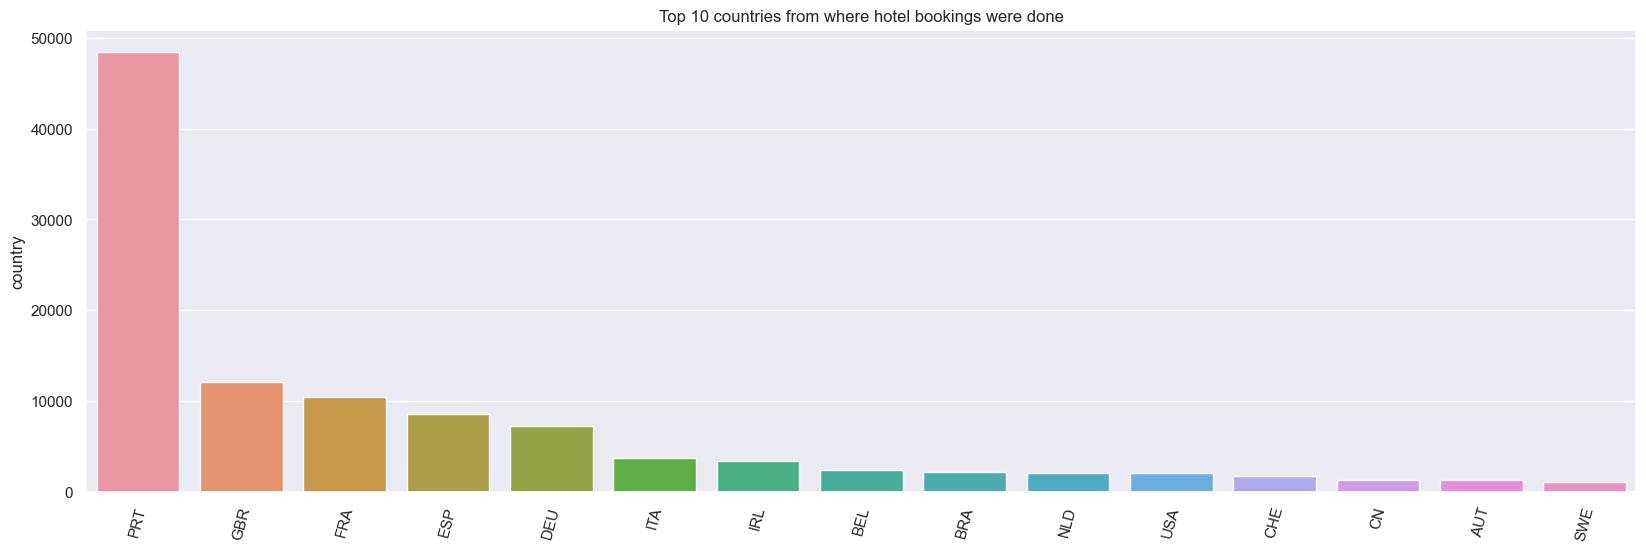

In [136]:
#This indicates that PRT country has booked the hotel multiple times,
#we create a barplot to explore the countries which has done more number of bookings

plt.figure(figsize=(20,6))
plt.xticks(rotation=75)
sns.set_style('whitegrid')
plt.title('Top 10 countries from where hotel bookings were done')
sns.barplot(x=countrywise_bookings.index, y=countrywise_bookings);





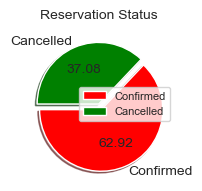

In [137]:
#Next we evaulate reservation status with how many bookings were confirmed and how many are canceled

plt.figure(figsize= (5,2))
plt.pie(df['is_canceled'].value_counts(),
                    autopct = '%.2f',
                    explode = [0.1,0],
                    labels = ['Confirmed', 'Cancelled'],
                    shadow = True, 
                    textprops = {'fontsize':10},
                    colors = ['red', 'green'],
                    startangle = 180
)
plt.title('Reservation Status', fontsize = 10)
plt.legend(fontsize = 8, loc = 'right')
plt.show()

In [138]:
#From the graph pie chart we found that 62.96% booking was confirmed and 37.04% canceled

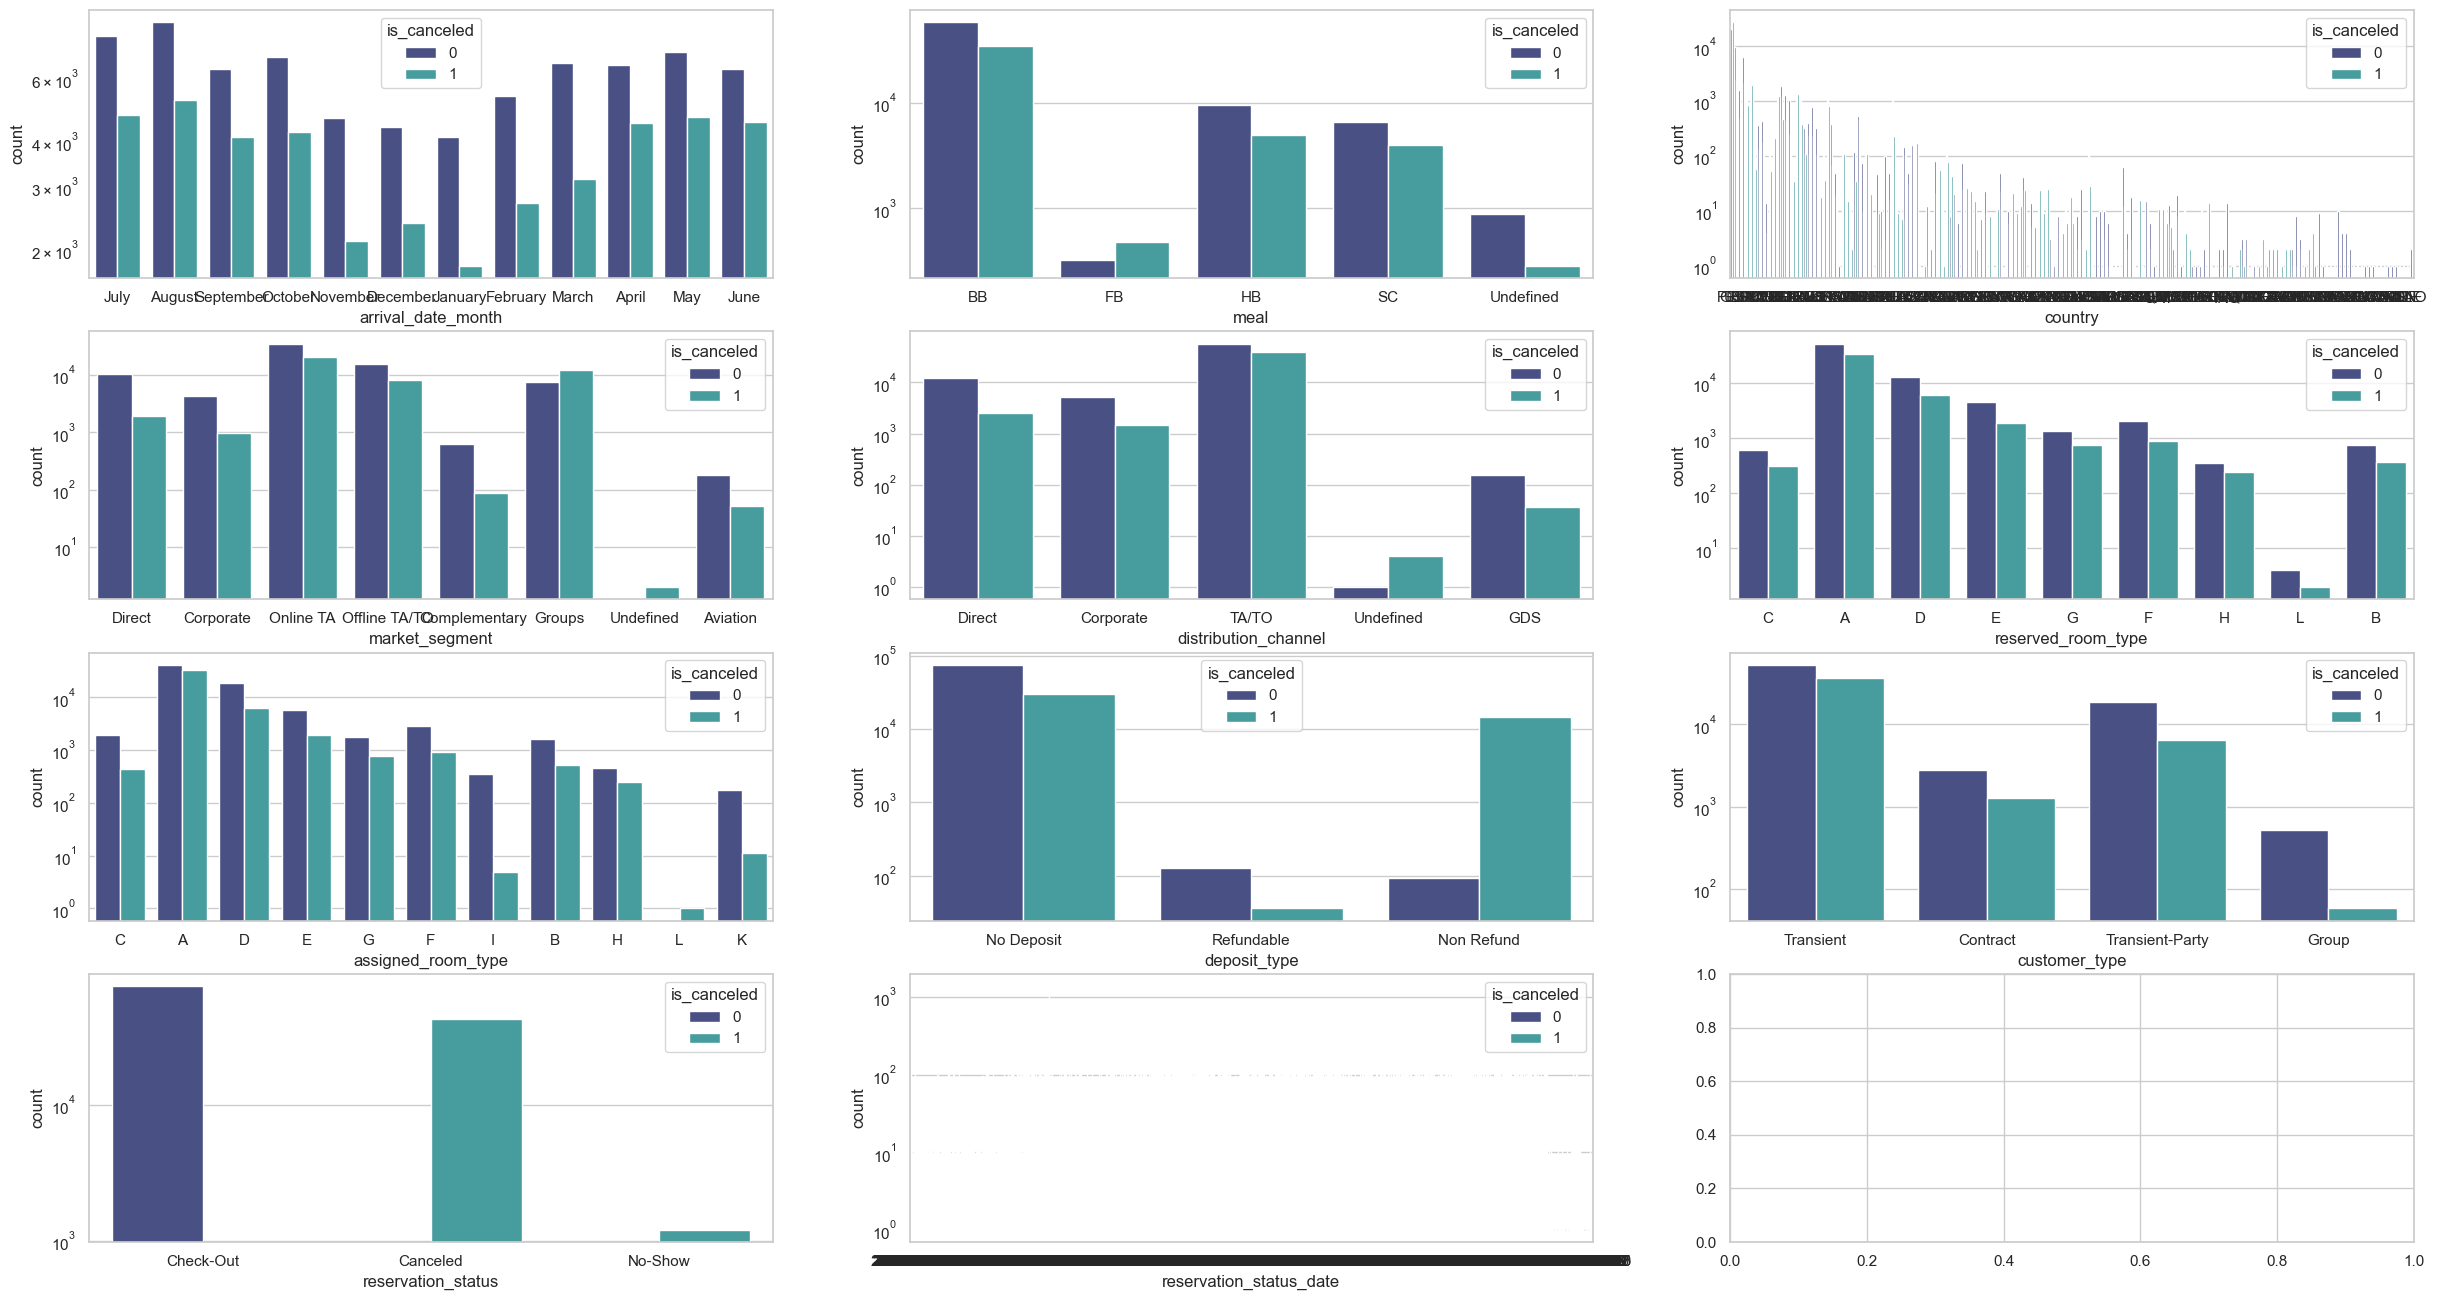

In [139]:
# select all features that have object types
categorical_var = df.dtypes[df.dtypes == object][1:].index.tolist()

# create 4 empty plots
fig, ax = plt.subplots(4,3,figsize=(30,16))

# iterate those selected variables visualised in barplot
for ix, ctg in enumerate(categorical_var):
    g = sns.countplot(x = ctg, hue = 'is_canceled', data = df, palette= 'mako', log = True, ax = ax.flatten()[ix])

In [140]:
df.value_counts("deposit_type")

deposit_type
No Deposit    104461
Non Refund     14587
Refundable       162
dtype: int64

In [141]:
print(df["arrival_date_month"])

0           July
1           July
2           July
3           July
4           July
           ...  
119385    August
119386    August
119387    August
119388    August
119389    August
Name: arrival_date_month, Length: 119210, dtype: object


In [142]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [143]:
df.value_counts("hotel")

hotel
City Hotel      79163
Resort Hotel    40047
dtype: int64

In [144]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

<AxesSubplot: xlabel='is_canceled', ylabel='count'>

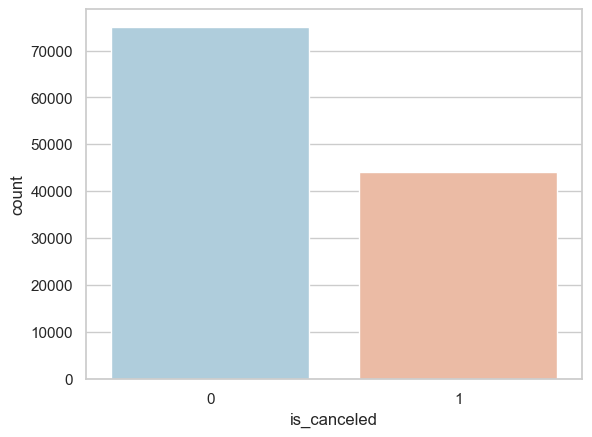

In [145]:
sns.set_style('whitegrid')
sns.countplot(x='is_canceled',data=df,palette='RdBu_r')


In [146]:
df.info

<bound method DataFrame.info of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27  

<AxesSubplot: >

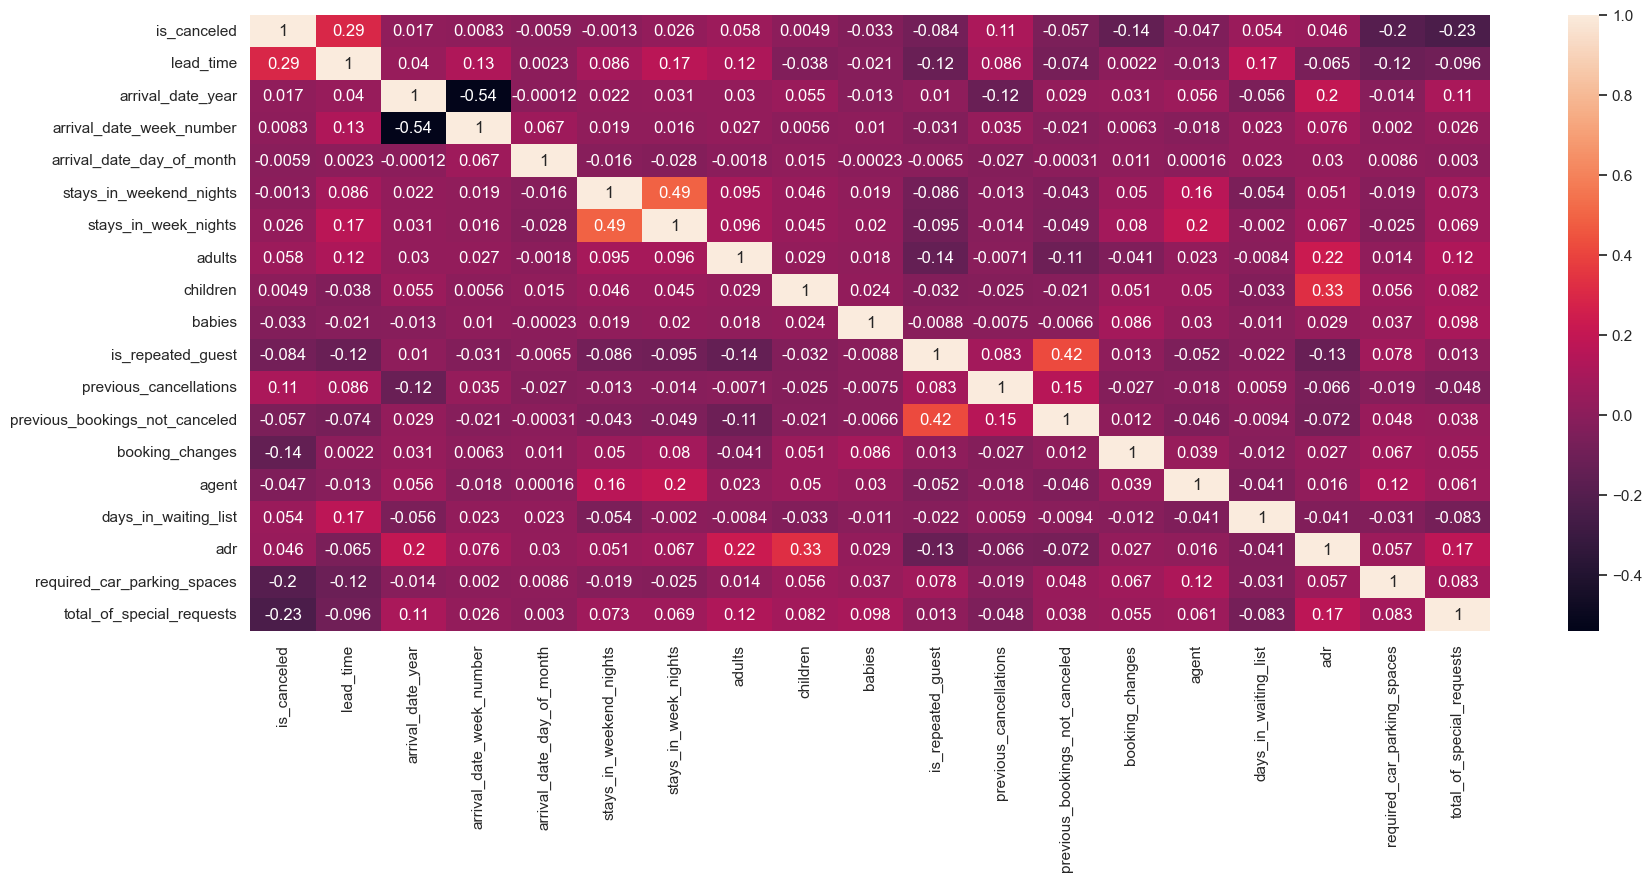

In [147]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)


df.corr()['is_canceled'].abs().sort_values(ascending=False)

In [150]:
# dropping columns that are not useful

useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']
df.drop(useless_col, axis = 1, inplace = True)

In [151]:
cat_cols = ['hotel','arrival_date_month',  'meal', 
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
  'deposit_type',
 'customer_type',
 'reservation_status_date']
cat_cols
cat_df = df[cat_cols]
cat_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [152]:
# converting reservation status date to different columns as date month and year,
# since 'arrival_date_month' and 'reservation_status_date' month is same 
# so we drop those two columns

In [153]:

from datetime import datetime
cat_df['year']=pd.DatetimeIndex(cat_df['reservation_status_date']).year

cat_df['month']=pd.DatetimeIndex(cat_df['reservation_status_date']).month

cat_df['date']=pd.DatetimeIndex(cat_df['reservation_status_date']).day

cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)
cat_df.columns




Index(['hotel', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'deposit_type', 'customer_type', 'year', 'month',
       'date'],
      dtype='object')

In [154]:
cat_df['hotel'] = cat_df['hotel'].replace({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].replace({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].replace({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].replace({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].replace({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].replace({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].replace({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

# cat_df['year'] = cat_df['year'].replace({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [155]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,date
0,0,0,0,0,0,0,0,2015,7,1
1,0,0,0,0,0,0,0,2015,7,1
2,0,0,0,0,1,0,0,2015,7,2
3,0,0,1,1,1,0,0,2015,7,2
4,0,0,2,2,1,0,0,2015,7,3


In [156]:
num_df = df.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,adr,required_car_parking_spaces,total_of_special_requests
0,342,27,1,0,0,2,0.0,0,0,0,0,0.0,0.00,0,0
1,737,27,1,0,0,2,0.0,0,0,0,0,0.0,0.00,0,0
2,7,27,1,0,1,1,0.0,0,0,0,0,0.0,75.00,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,75.00,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,394.0,96.14,0,0
119386,102,35,31,2,5,3,0.0,0,0,0,0,9.0,225.43,0,2
119387,34,35,31,2,5,2,0.0,0,0,0,0,9.0,157.71,0,4
119388,109,35,31,2,5,2,0.0,0,0,0,0,89.0,104.40,0,0


In [157]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['is_canceled']

In [158]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier



### Feature Scaling

In [159]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaler=ss.fit_transform(X)
X=pd.DataFrame(X_scaler,columns=X.columns[:])
X

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,date,...,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,adr,required_car_parking_spaces,total_of_special_requests
0,-1.405970,-0.519220,-1.736750,-2.499201,-1.335557,-0.374708,-0.561625,-1.528792,0.199166,-1.670641,...,0.244780,-0.260869,-0.081641,-0.180343,-0.103195,-0.09151,-0.698798,-2.021841,-0.254947,-0.720802
1,-1.405970,-0.519220,-1.736750,-2.499201,-1.335557,-0.374708,-0.561625,-1.528792,0.199166,-1.670641,...,0.244780,-0.260869,-0.081641,-0.180343,-0.103195,-0.09151,-0.698798,-2.021841,-0.254947,-0.720802
2,-1.405970,-0.519220,-1.736750,-2.499201,-0.447069,-0.374708,-0.561625,-1.528792,0.199166,-1.556730,...,-1.493796,-0.260869,-0.081641,-0.180343,-0.103195,-0.09151,-0.698798,-0.534742,-0.254947,-0.720802
3,-1.405970,-0.519220,-1.032942,-1.031118,-0.447069,-0.374708,-0.561625,-1.528792,0.199166,-1.556730,...,-1.493796,-0.260869,-0.081641,-0.180343,-0.103195,-0.09151,2.137858,-0.534742,-0.254947,-0.720802
4,-1.405970,-0.519220,-0.329133,0.436964,-0.447069,-0.374708,-0.561625,-1.528792,0.199166,-1.442820,...,0.244780,-0.260869,-0.081641,-0.180343,-0.103195,-0.09151,1.540667,-0.078699,-0.254947,0.540435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0.711253,-0.519220,0.374676,0.436964,-0.447069,-0.374708,-0.561625,1.267227,0.796930,-1.101089,...,0.244780,-0.260869,-0.081641,-0.180343,-0.103195,-0.09151,2.977658,-0.115579,-0.254947,-0.720802
119206,0.711253,-0.519220,-0.329133,0.436964,1.329907,-0.374708,-0.561625,1.267227,0.796930,-0.987179,...,1.983357,-0.260869,-0.081641,-0.180343,-0.103195,-0.09151,-0.614818,2.447980,-0.254947,1.801672
119207,0.711253,-0.519220,-0.329133,0.436964,0.441419,-0.374708,-0.561625,1.267227,0.796930,-0.987179,...,0.244780,-0.260869,-0.081641,-0.180343,-0.103195,-0.09151,-0.614818,1.105229,-0.254947,4.324145
119208,0.711253,-0.519220,-0.329133,0.436964,-0.447069,-0.374708,-0.561625,1.267227,0.796930,-0.987179,...,0.244780,-0.260869,-0.081641,-0.180343,-0.103195,-0.09151,0.131671,0.048200,-0.254947,-0.720802


In [160]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [179]:
#Since data is imbalanced data set with difference in 
# value_counts  of is_canceled is large thus we apply oversampling
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
x_ros,y_ros=ros.fit_resample(X,y)

In [180]:
df.value_counts("is_canceled")

is_canceled
0    75011
1    44199
dtype: int64

In [181]:
 y_ros.value_counts()

0    75011
1    75011
Name: is_canceled, dtype: int64

In [182]:
# In order to reduce the dimensionality of data we use PCA
from sklearn.decomposition import PCA
pca=PCA(0.95)
x_pca=pca.fit_transform(x_ros)

## Model Training and Prediction 

In [165]:
#Train_Test_Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_pca,y_ros,test_size=0.2,random_state=11)

In [166]:
# Results with Logistic Regression Algorithm

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print(f"Accuracy Score of Logistic Regression is : {accuracy_score(y_test, y_pred_lr)}")
print(f"Confusion Matrix : \n{confusion_matrix(y_test, y_pred_lr)}")
print(f"Classification Report : \n{classification_report(y_test, y_pred_lr)}")



Accuracy Score of Logistic Regression is : 0.7611064822529578
Confusion Matrix : 
[[12247  2807]
 [ 4361 10590]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.74      0.81      0.77     15054
           1       0.79      0.71      0.75     14951

    accuracy                           0.76     30005
   macro avg       0.76      0.76      0.76     30005
weighted avg       0.76      0.76      0.76     30005



In [167]:
# Results with KNN Algorithm
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)


print(f"Accuracy Score of KNN is : {accuracy_score(y_test, y_pred_knn)}")
print(f"Confusion Matrix : {confusion_matrix(y_test, y_pred_knn)}")
print(f"Classification Report : {classification_report(y_test, y_pred_knn)}")

Accuracy Score of KNN is : 0.8875520746542243
Confusion Matrix : [[13728  1326]
 [ 2048 12903]]
Classification Report :               precision    recall  f1-score   support

           0       0.87      0.91      0.89     15054
           1       0.91      0.86      0.88     14951

    accuracy                           0.89     30005
   macro avg       0.89      0.89      0.89     30005
weighted avg       0.89      0.89      0.89     30005



In [168]:
# Results with Decision Tree Classification Algorithm
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)


print(f"Accuracy Score of Decision Tree is : {accuracy_score(y_test, y_pred_dtc)}")
print(f"Confusion Matrix : {confusion_matrix(y_test, y_pred_dtc)}")
print(f"Classification Report : {classification_report(y_test, y_pred_dtc)}")

Accuracy Score of Decision Tree is : 0.9284119313447758
Confusion Matrix : [[13666  1388]
 [  760 14191]]
Classification Report :               precision    recall  f1-score   support

           0       0.95      0.91      0.93     15054
           1       0.91      0.95      0.93     14951

    accuracy                           0.93     30005
   macro avg       0.93      0.93      0.93     30005
weighted avg       0.93      0.93      0.93     30005



In [169]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)



print(f"Accuracy Score of Random Forest is : {accuracy_score(y_test, y_pred_rd_clf)}")
print(f"Confusion Matrix : {confusion_matrix(y_test, y_pred_rd_clf)}")
print(f"Classification Report : {classification_report(y_test, y_pred_rd_clf)}")

Accuracy Score of Random Forest is : 0.9618063656057324
Confusion Matrix : [[14719   335]
 [  811 14140]]
Classification Report :               precision    recall  f1-score   support

           0       0.95      0.98      0.96     15054
           1       0.98      0.95      0.96     14951

    accuracy                           0.96     30005
   macro avg       0.96      0.96      0.96     30005
weighted avg       0.96      0.96      0.96     30005



## Hyper Parameter Tuning

In [175]:
#GridSearch CV

from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':[2,3,4,5,6,8,10,14,16], 'criterion':['gini','entropy'],
             'max_leaf_nodes':[2,5,10,15,20,25,30],'min_samples_split':[10,20,30,40], 
              }
dt1=DecisionTreeClassifier(random_state=77)
grid=GridSearchCV(dt1,param_grid,cv=10)
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'max_leaf_nodes': 30,
 'min_samples_split': 10}

In [176]:
dtc_grids=DecisionTreeClassifier(random_state=77,max_depth=14,max_leaf_nodes=30,criterion='gini',min_samples_split=10)
dtc_grids.fit(X_train, y_train)

y_pred_dtc = dtc_grids.predict(X_test)


print(f"Accuracy Score of Decision Tree is : {accuracy_score(y_test, y_pred_dtc)}")
print(f"Confusion Matrix : {confusion_matrix(y_test, y_pred_dtc)}")
print(f"Classification Report : {classification_report(y_test, y_pred_dtc)}")


Accuracy Score of Decision Tree is : 0.7739376770538243
Confusion Matrix : [[12748  2306]
 [ 4477 10474]]
Classification Report :               precision    recall  f1-score   support

           0       0.74      0.85      0.79     15054
           1       0.82      0.70      0.76     14951

    accuracy                           0.77     30005
   macro avg       0.78      0.77      0.77     30005
weighted avg       0.78      0.77      0.77     30005



In [177]:
from sklearn.ensemble import RandomForestClassifier
rd_clf_grids=RandomForestClassifier(random_state=77,max_depth=14,max_leaf_nodes=30,criterion='gini',n_estimators=30)
rd_clf_grids= RandomForestClassifier()
rd_clf_grids.fit(X_train, y_train)

y_pred_rd_clf = rd_clf_grids.predict(X_test)


print(f"Accuracy Score of Random Forest is : {accuracy_score(y_test, y_pred_rd_clf)}")
print(f"Confusion Matrix : {confusion_matrix(y_test, y_pred_rd_clf)}")
print(f"Classification Report : {classification_report(y_test, y_pred_rd_clf)}")

Accuracy Score of Random Forest is : 0.9624395934010999
Confusion Matrix : [[14741   313]
 [  814 14137]]
Classification Report :               precision    recall  f1-score   support

           0       0.95      0.98      0.96     15054
           1       0.98      0.95      0.96     14951

    accuracy                           0.96     30005
   macro avg       0.96      0.96      0.96     30005
weighted avg       0.96      0.96      0.96     30005



### Model Evaluation and Conclusion

In [191]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier','KNN'],
    'Score' : [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dtc), accuracy_score(y_test, y_pred_rd_clf),  accuracy_score(y_test, y_pred_knn)]})


models.sort_values(by = 'Score')

,Model,Score
0,Logistic Regression,0.761106
1,Decision Tree Classifier,0.773938
3,KNN,0.887552
2,Random Forest Classifier,0.962440


#### As shown in the above table random forest classifier is most suitable with higher Accuracy